***Task 1 :Stock Prediction***
Take stock price of any company you want and predicts its price by using LSTM.Use only Jupyter notebook code.
Importing important Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [5]:
!pip install tensorflow

In [8]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.1 kB 259.2 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/59.1 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 311.2 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-non

***Load the Dataset***

In [15]:
df=pd.read_csv("TSLA.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [16]:
df.shape

(2416, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


**Ploting the closing price of the stock to visualize the trend**


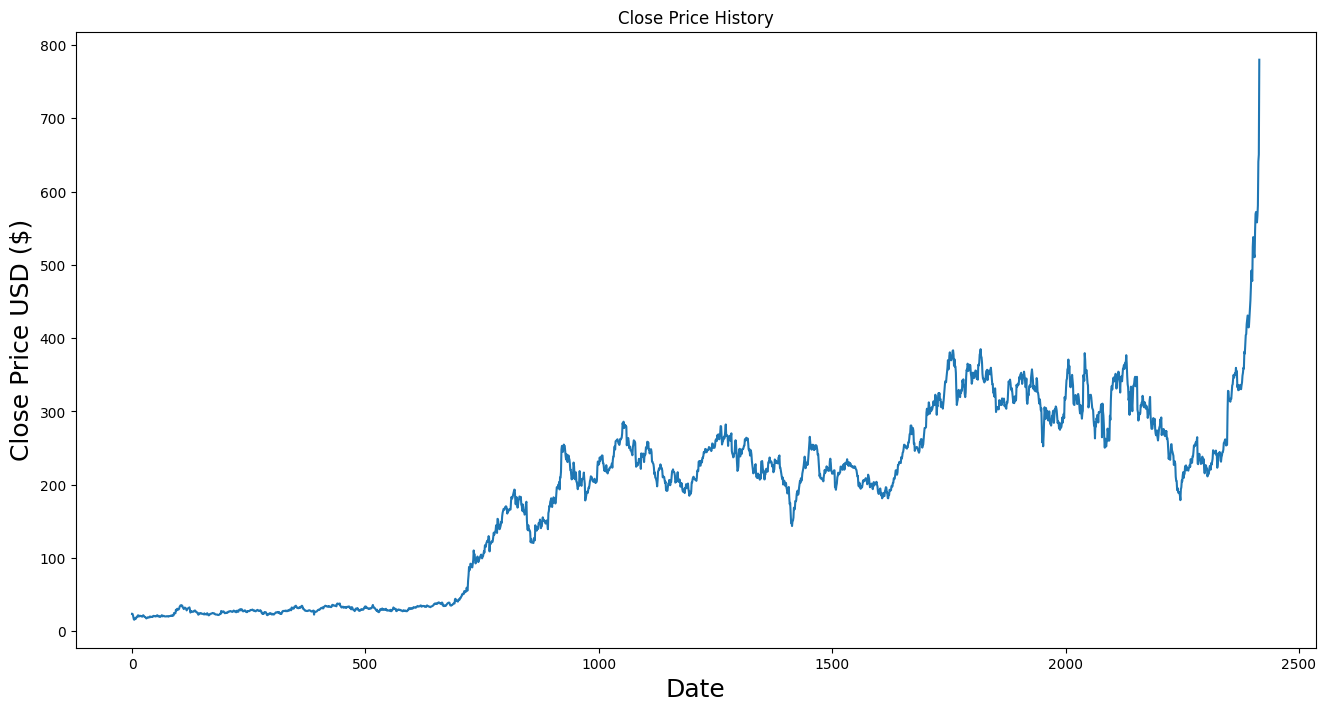

In [18]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

**we need to preprocess the data before feeding it into the LSTM.**


In [20]:
data = df.filter(['Close']).values

**we will normalize the data between 0 and 1 using the MinMaxScaler:**


In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

**To Train the Dataset**



In [22]:
train_data = scaled_data[:int(len(scaled_data)*0.8)]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**Build the LSTM model**


In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
59/59 [==============================] - 8s 56ms/step - loss: 0.0034
Epoch 2/50
59/59 [==============================] - 4s 65ms/step - loss: 8.2925e-04
Epoch 3/50
59/59 [==============================] - 3s 59ms/step - loss: 7.6298e-04
Epoch 4/50
59/59 [==============================] - 4s 62ms/step - loss: 7.9276e-04
Epoch 5/50
59/59 [==============================] - 4s 61ms/step - loss: 7.6237e-04
Epoch 6/50
59/59 [==============================] - 4s 65ms/step - loss: 7.3382e-04
Epoch 7/50
59/59 [==============================] - 4s 67ms/step - loss: 6.9722e-04
Epoch 8/50
59/59 [==============================] - 4s 75ms/step - loss: 5.8991e-04
Epoch 9/50
59/59 [==============================] - 4s 70ms/step - loss: 7.0386e-04
Epoch 10/50
59/59 [==============================] - 4s 71ms/step - loss: 6.3032e-04
Epoch 11/50
59/59 [==============================] - 4s 67ms/step - loss: 6.1093e-04
Epoch 12/50
59/59 [==============================] - 4s 66ms/step - loss: 5.32

**predictions on the test data**


In [24]:
test_data = scaled_data[int(len(scaled_data)*0.8) - 60:]
x_test = []
y_test = data[int(len(data)*0.8):, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 22ms/step


**Visualizing the Predicted price as compared to Actual price**


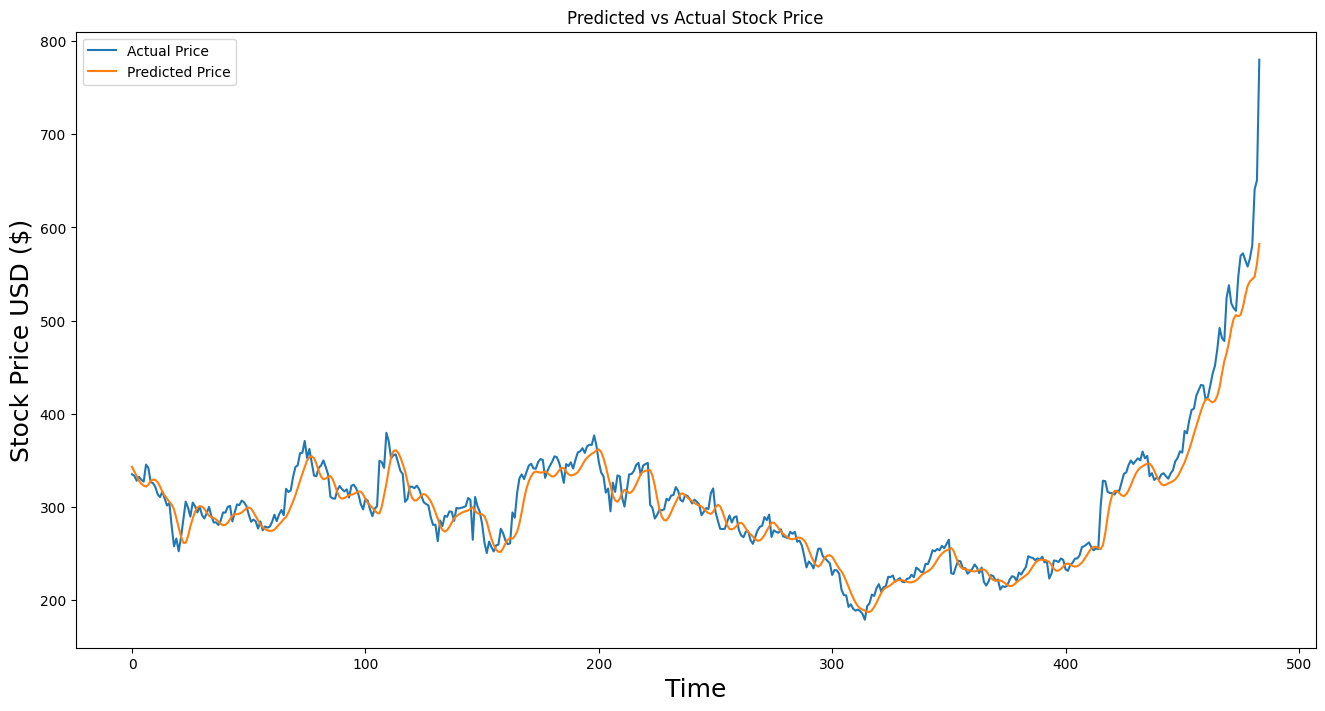

In [25]:
plt.figure(figsize=(16,8))
plt.title('Predicted vs Actual Stock Price')
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Stock Price USD ($)', fontsize=18)
plt.legend()
plt.show()